<a href="https://colab.research.google.com/github/alinyaraujos/machine-learning/blob/activity-4/activity_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



O conjunto de dados analisados é sobre doença cardíaca UCI

https://www.kaggle.com/ronitf/heart-disease-uci?select=heart.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [ ]:
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/heart.csv')

In [ ]:
dados.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#verificar se existem valores NAN, ? ou dados faltantes
dados = dados.dropna()

In [ ]:
#Re-escala dos dados usando usando máximo e mínimo
dados = (dados - dados.min())/(dados.max()-dados.min())

In [ ]:
#dividindo dados em atributos descritores e atributo de classe
X = dados.iloc[:,:-1]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [ ]:
y = dados.target
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: target, dtype: float64

In [ ]:
#agrupamento - Definido o algoritmo de agrupamento, criando o modelo e ajustando aos dados
#foi definido 2 clusters, ou seja vão ser criados 2 centróide e as instâncias vão ficar mais próximas do qual elas forem mais similar 
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#aplicando o modelo 
kmeans_labels = kmeans.predict(X)
kmeans_labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [ ]:
X = X.reset_index(drop=True)

In [ ]:
# adicionando as labels ao teste para fins de visualização
grupos = pd.DataFrame(kmeans_labels)
X.insert((X.shape[1]),'target',grupos)

In [ ]:
noTarget = X[X['target']==0]
target = X[X['target']==1]

In [ ]:
plt.rcParams["figure.figsize"] = (8,5)

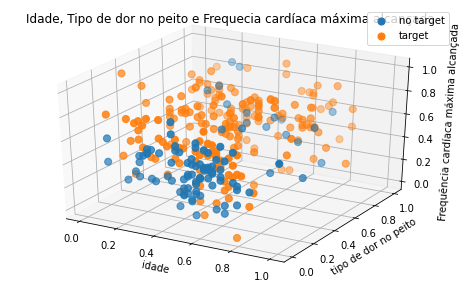

In [ ]:
#plotando alguns atributos das classes
ax = plt.axes(projection='3d')
ax.scatter3D(noTarget.age,noTarget.cp,noTarget.thalach,s=50,label='no target')
ax.scatter3D(target.age,target.cp,target.thalach,s=50,label='target')
plt.legend()
ax.set_xlabel('idade')
ax.set_ylabel('tipo de dor no peito')
ax.set_zlabel('Frequência cardíaca máxima alcançada')
plt.title('Idade, Tipo de dor no peito e Frequecia cardíaca máxima alcançada')
plt.show()

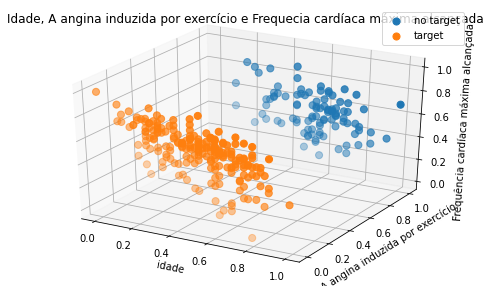

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter3D(noTarget.age,noTarget.exang,noTarget.thalach,s=50,label='no target')
ax.scatter3D(target.age,target.exang,target.thalach,s=50,label='target')
plt.legend()
ax.set_xlabel('idade')
ax.set_ylabel('A angina induzida por exercício')
ax.set_zlabel('Frequência cardíaca máxima alcançada')
plt.title('Idade, A angina induzida por exercício e Frequecia cardíaca máxima alcançada')
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (25,20)

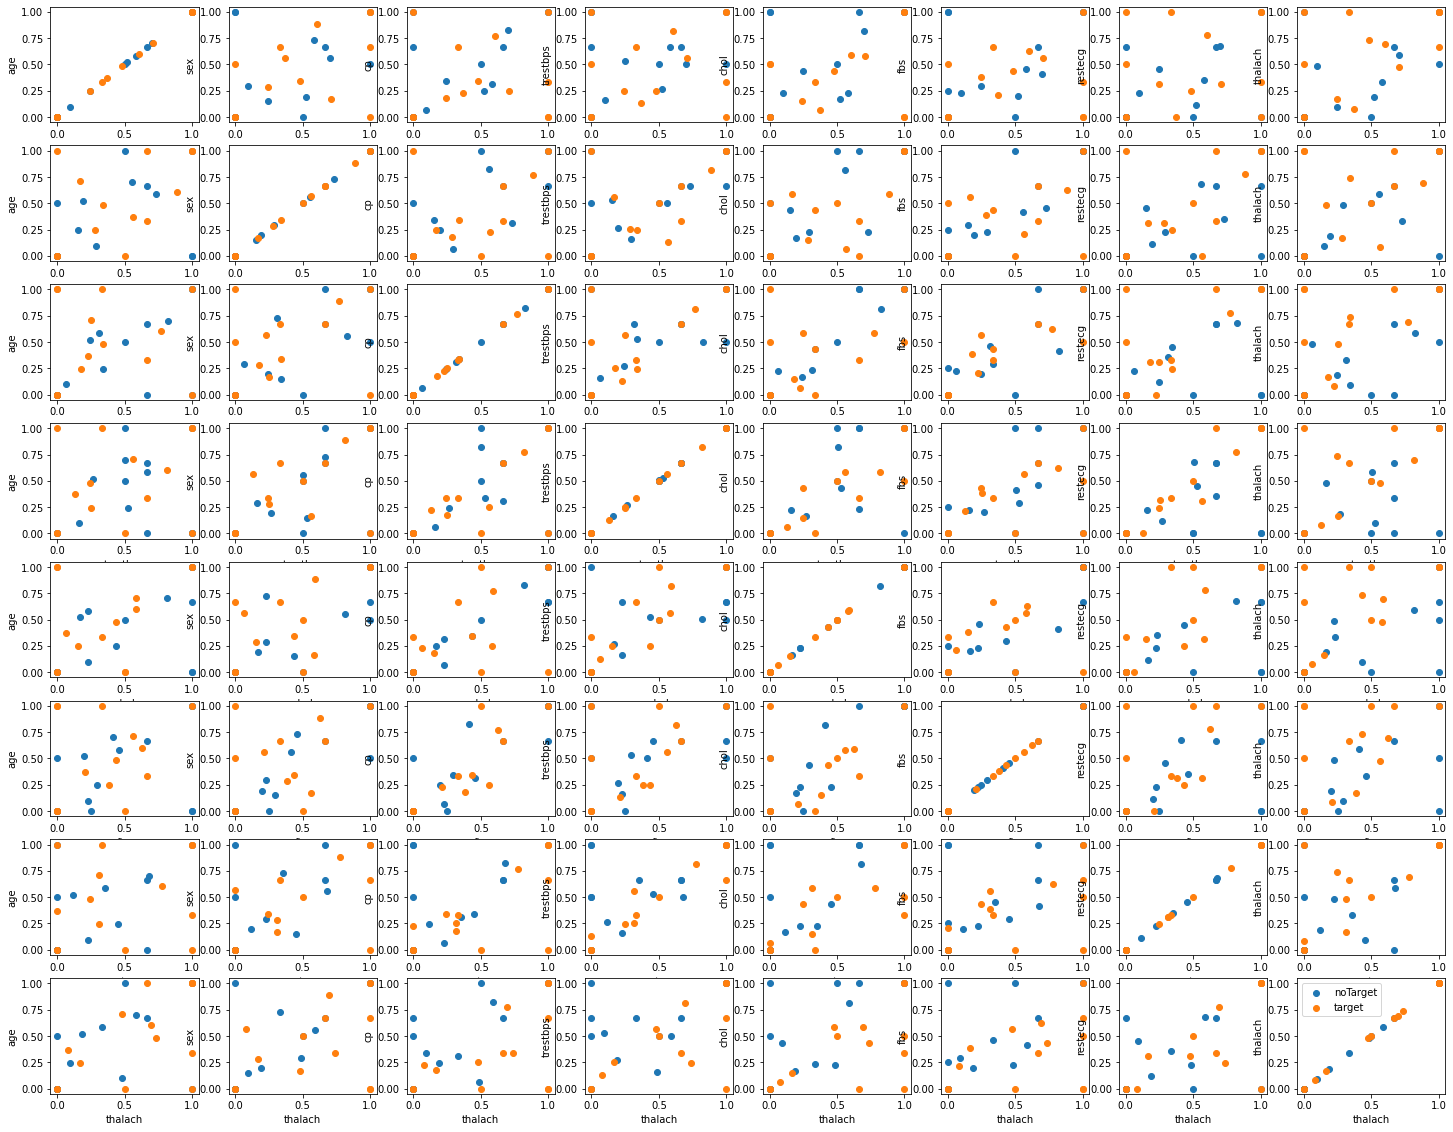

In [ ]:
#plotando comparação de alguns atributos
fig, axs = plt.subplots(8,8)
for i in range(8):
  for j in range(8):
    axs[i,j].scatter(noTarget.iloc[i],noTarget.iloc[j],label='noTarget')
    axs[i,j].scatter(target.iloc[i],target.iloc[j],label='target')
    axs[i,j].set(xlabel=X.columns[i],ylabel=X.columns[j])
plt.legend()
plt.show()

**Avaliado o modelo**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Da primeira vez que foi excutado acredito que os centróides ficaram com as classes trocadas, então era a taxa de erro. Após a segunda execução à acurácia foi: 
acuracia = accuracy_score(y,kmeans_labels)
round(acuracia,3)

0.719

In [ ]:
from sklearn.metrics import adjusted_rand_score

In [ ]:
# mede a similariedade entre duas atribuições, e verifica o quanto foram boas essas atribuições. Pelo o reusltado não foi muito bom . 
rand_score = adjusted_rand_score(y,kmeans_labels)
rand_score

0.18955638170030023

In [ ]:
from sklearn.metrics import adjusted_mutual_info_score

In [ ]:
# mede a similariedade entre duas atribuições porém com um cálculo diferente do anterior, e verifica o quanto foram boas essas atribuições. Pelo o reusltado não foi muito bom . 
mutual_info = adjusted_mutual_info_score(y,kmeans_labels)
mutual_info

0.14709472393199455

In [ ]:
from sklearn.metrics import fowlkes_mallows_score

In [ ]:
# média geométrica de precisão e recall - Esse teve um resulado melhor . 
fm = fowlkes_mallows_score(y,kmeans_labels)
fm

0.6191240929827019

**Métricas quando as classes não são conhecidas**


In [ ]:
#excluindo a coluna alvo
X = X.drop(columns=['target'])

In [ ]:
from sklearn.metrics import davies_bouldin_score

In [ ]:
#Esse índice indica uma smiliaridade média entre os grupos
db = davies_bouldin_score(X,kmeans_labels)
db

1.6164411255675288

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
#a distância média entre uma instância e todas as instâncias no mesmo grupo
ss = silhouette_score(X,kmeans_labels,metric='euclidean')
ss

0.251779659446837

In [ ]:
from sklearn.metrics import calinski_harabasz_score

In [ ]:
# critério da taxa de variância - irá testar a similaridade com base na variância dos atributos dentro dos grupos
ch = calinski_harabasz_score(X,kmeans_labels)
ch

93.82152315170765

In [ ]:
#agrupamento hierárquico
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hierarquico = AgglomerativeClustering(n_clusters=2)
labels_hierarquico = hierarquico.fit(X).labels_

In [ ]:
labels_hierarquico

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,

**Avaliando o modelo**

In [ ]:
#acurácia - Provavelmente as classes ficaram trocadas, logo essa é a taxa de erro . 
acuracia = accuracy_score(y,labels_hierarquico)
round(acuracia,3)

0.32

In [ ]:
#índice rand ajustado
rand_score = adjusted_rand_score(y,labels_hierarquico)
rand_score

0.12570584843034827

In [ ]:
#índice baseado em informação mútua
mutual_info = adjusted_mutual_info_score(y,labels_hierarquico)
mutual_info

0.10142271867219965

In [ ]:
#índice Fowlkes Mallows
fm = fowlkes_mallows_score(y,labels_hierarquico)
fm

0.6065547048116889

In [ ]:
#indice Davies-Boldin
db = davies_bouldin_score(X,labels_hierarquico)
db

1.6702461102080937

In [ ]:
#coeficiente de silhueta
ss = silhouette_score(X,labels_hierarquico,metric='euclidean')
ss

0.2134481074723829

In [ ]:
#indice de Calinski-Harabasz
ch = calinski_harabasz_score(X,labels_hierarquico)
ch

72.23681769686488

**De forma geral os dois modelos tiveram resultados bem parecidos**